<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/ml_otimizacao_modelos/ml_otimizacao_modelos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz
!pip install pydot

!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
# Situação de azar

dados_azar = dados.sort_values('vendido', ascending=True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [5]:
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Acurácia com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao)*100))

Acurácia com dummy stratified, 10 = [49.79, 53.45]


In [6]:
SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Acurácia com validação cruzada, 10 = [%.2f, %.2f]" % ((media-2*desvio_padrao)*100,(media+2*desvio_padrao)*100))

Acurácia com validação cruzada, 10 = [73.83, 77.73]


In [7]:
# Gerando dados aleatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=len(dados))
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1 # primeiro modelo
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [0]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print('Acurácia média %.2f' % media)
  print('Intervalo [%.2f, %.2f]' %  (media-2*desvio, media+2*desvio))

In [9]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 75.78
Intervalo [73.67, 77.90]


In [10]:
# GroupKFold em um pipeline com StandardScaler e SVC
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler),('estimador', modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)


Acurácia média 76.68
Intervalo [74.28, 79.08]


In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 75.78
Intervalo [73.67, 77.90]


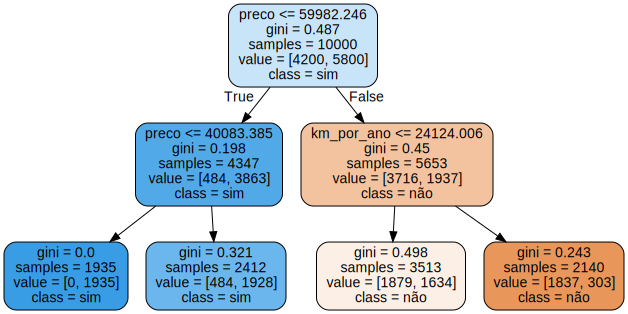

In [13]:
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [16]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 78.67
Intervalo [76.40, 80.94]


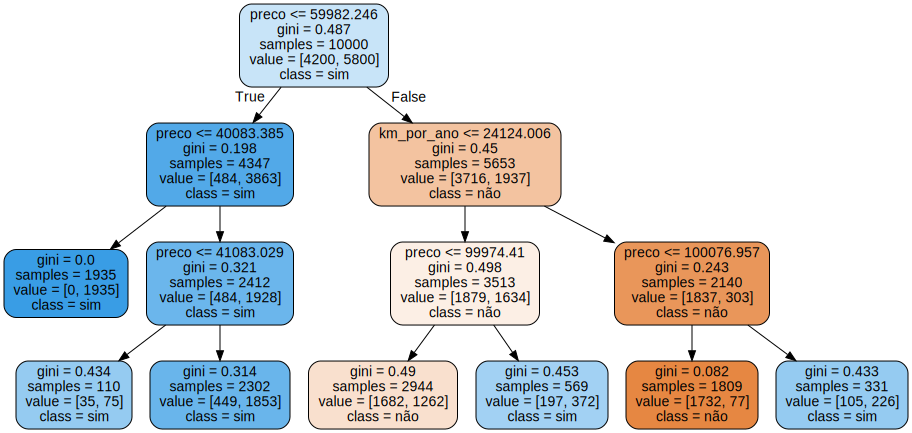

In [17]:
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [18]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 77.19
Intervalo [75.26, 79.13]


# Testando parâmetros

In [30]:
def roda_arvore_de_decisao(max_depth, x, y):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x, y, cv=cv, groups=dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Arvore max_depth = %d, treino = %.2f, test = %.2f' % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i, x_azar, y_azar) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train_score', 'test_score'])

Arvore max_depth = 1, treino = 75.79, test = 75.78
Arvore max_depth = 2, treino = 75.79, test = 75.78
Arvore max_depth = 3, treino = 78.75, test = 78.67
Arvore max_depth = 4, treino = 78.79, test = 78.63
Arvore max_depth = 5, treino = 78.94, test = 78.56
Arvore max_depth = 6, treino = 79.17, test = 78.12
Arvore max_depth = 7, treino = 79.50, test = 77.96
Arvore max_depth = 8, treino = 79.89, test = 77.86
Arvore max_depth = 9, treino = 80.46, test = 77.38
Arvore max_depth = 10, treino = 81.16, test = 77.19
Arvore max_depth = 11, treino = 82.03, test = 76.97
Arvore max_depth = 12, treino = 82.89, test = 76.49
Arvore max_depth = 13, treino = 83.95, test = 75.81
Arvore max_depth = 14, treino = 85.03, test = 75.66
Arvore max_depth = 15, treino = 86.14, test = 75.16
Arvore max_depth = 16, treino = 87.19, test = 75.11
Arvore max_depth = 17, treino = 88.31, test = 74.74
Arvore max_depth = 18, treino = 89.26, test = 74.33
Arvore max_depth = 19, treino = 90.32, test = 74.34
Arvore max_depth = 20

# Overfit: perfeito no treino e ruim para o teste

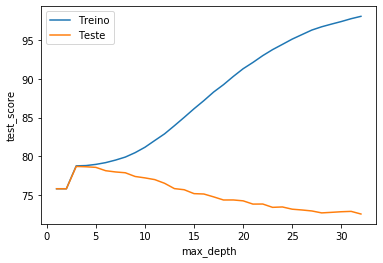

In [36]:
sns.lineplot(data=resultados, x='max_depth', y='train_score')
sns.lineplot(data=resultados, x='max_depth', y='test_score')
plt.legend(['Treino', 'Teste'])

In [38]:
resultados.sort_values('test_score', ascending=False).head()

,max_depth,train_score,test_score
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiper parâmetros em 2 dimensões

In [54]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, x, y):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x, y, cv=cv, groups=dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, test = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, x_azar, y_azar)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train_score', 'test_score'])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, test = 75.78
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, test = 78.67
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, test = 78.67
Arvore max_depth = 4, min_sample

,max_depth,min_samples_leaf,train_score,test_score
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [43]:
 resultados.sort_values('test_score', ascending=False)

,max_depth,min_samples_leaf,train_score,test_score
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633
...,...,...,...,...
5,2,64,75.791169,75.784219
4,2,32,75.791169,75.784219
3,1,256,75.791169,75.784219
2,1,128,75.791169,75.784219


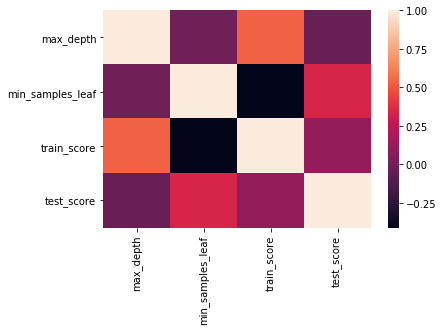

In [45]:
corr = resultados.corr()
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3217d42588>,
      dtype=object)

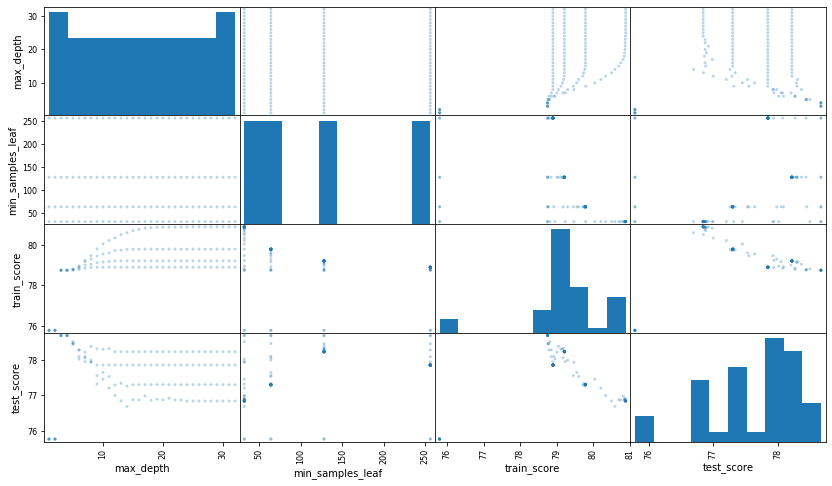

In [49]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

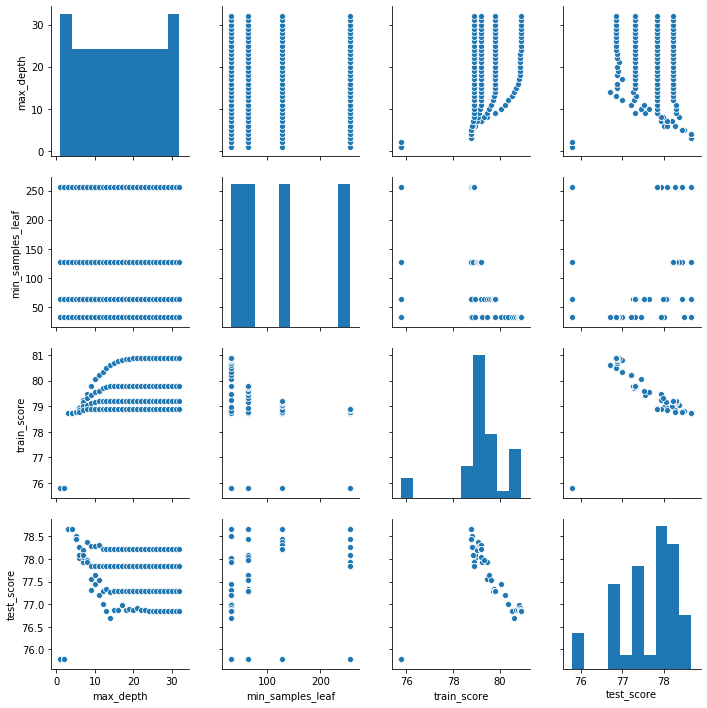

In [50]:
sns.pairplot(resultados)

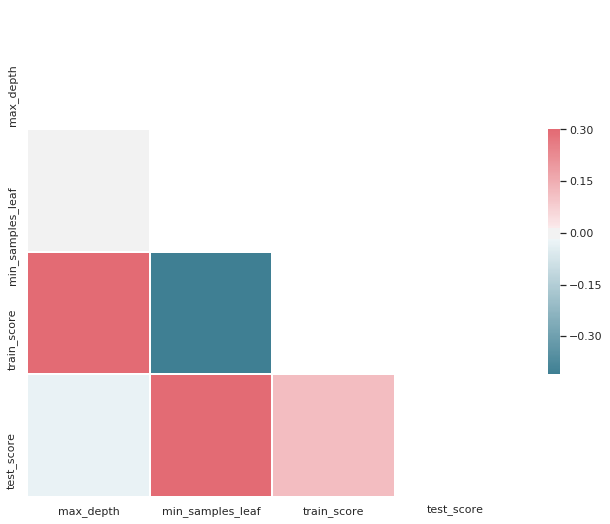

In [52]:
sns.set(style='white')

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [55]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, x, y):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x, y, cv=cv, groups=dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, test = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, x_azar, y_azar)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train_score', 'test_score'])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, test = 75.78
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, test = 75.78
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, test = 78.67
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.53, test = 77.50
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, test = 78.67
Arvore max_depth = 4, min

,max_depth,min_samples_leaf,train_score,test_score
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


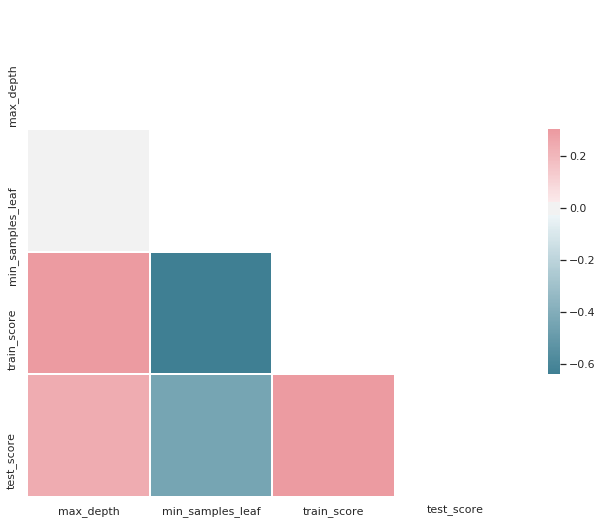

In [56]:
sns.set(style='white')

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
resultados.sort_values('test_score', ascending=False).head()

,max_depth,min_samples_leaf,train_score,test_score
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# Explorando 3 dimensões de híper parâmetros

In [61]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split, x, y):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x, y, cv=cv, groups=dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Arvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, treino = %.2f, test = %.2f' % (
      max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [128, 192, 256, 512]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split, x_azar, y_azar)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'train_score', 'test_score', 'fit_time', 'score_time'])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, min_samples_split = 32, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, min_samples_split = 64, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, min_samples_split = 128, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, min_samples_split = 256, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, min_samples_split = 32, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, min_samples_split = 64, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, min_samples_split = 128, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, min_samples_split = 256, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, min_samples_split = 32, treino = 75.79, test = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, min_samples_split = 64, treino = 75.79, test = 75.78
Arvore

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.006144,0.001360
1,1,128,64,75.791169,75.784219,0.005792,0.001270
2,1,128,128,75.791169,75.784219,0.005801,0.001235
3,1,128,256,75.791169,75.784219,0.005867,0.001370
4,1,192,32,75.791169,75.784219,0.005754,0.001279


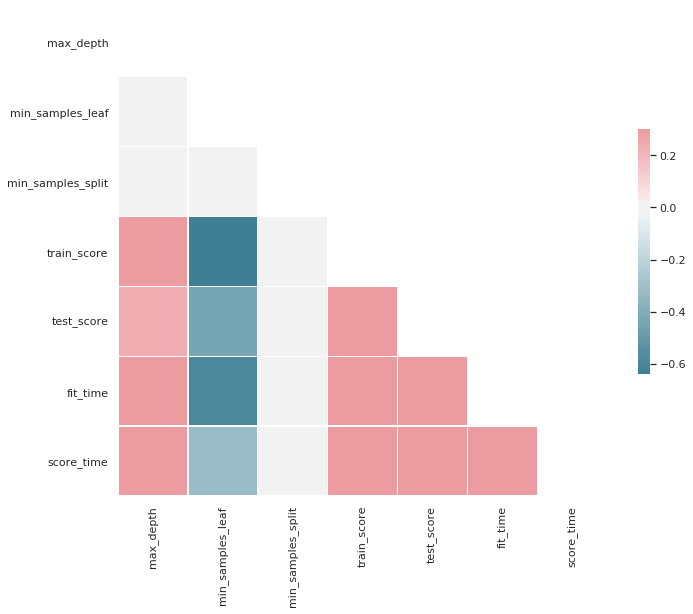

In [63]:
sns.set(style='white')

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
resultados.sort_values('test_score', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
54,4,192,128,78.750993,78.672633,0.012672,0.001581
55,4,192,256,78.750993,78.672633,0.012594,0.001458
32,3,128,32,78.750993,78.672633,0.010708,0.001335
33,3,128,64,78.750993,78.672633,0.010988,0.001452
34,3,128,128,78.750993,78.672633,0.011318,0.001547


# Explorando espaço de hiper parâmetros com GridSearchCV



In [65]:
SEED = 301
np.random.seed(SEED)

parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), parametros, cv=GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups=dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011700,0.001644,0.001670,0.000109,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
1,0.010993,0.000206,0.001547,0.000045,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
2,0.010830,0.000098,0.001552,0.000050,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
3,0.010909,0.000372,0.001504,0.000049,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1
4,0.010780,0.000167,0.001506,0.000038,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.7868,0.011338,1


In [68]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68


In [69]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
predicoes = melhor.predict(x_azar) 
acc = accuracy_score(predicoes, y_azar) * 100
print("Acurácia para os dados foi %.2f%%" % acc)

Acurácia para os dados foi 78.75%


* Evitar a abordagem anterior por ser otimista

# Como ter uma estimativa sem vício nos dados que já vimos?

* No caso de validação cruzada com busca de hiper parâmetros, fazemos uma nova validação cruzada (*Nested cross validation*)



In [74]:
cross_val_score(busca, x_azar, y_azar, cv=GroupKFold(n_splits=10), groups=dados.modelo)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

* Infelizmente como o Pandas não suporta *nested validation* com *group k-fold* não conseguimos prever o resultado para novos grupos;
* Então usamos o `KFold` normal.

In [77]:
SEED = 301
np.random.seed(SEED)

parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), parametros, cv=KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar, groups=dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011504,0.001923,0.001754,0.000058,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010422,0.000177,0.001761,0.000061,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.010447,0.000081,0.001785,0.000041,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010077,0.000106,0.001718,0.000038,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.009870,0.000103,0.001626,0.000056,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [78]:
scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [0]:
def imprime_scores(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print('Acurácia média %.2f' % media)
  print('Intervalo [%.2f, %.2f]' %  (media-2*desvio, media+2*desvio))

In [81]:
imprime_scores(scores)

Acurácia média 78.67
Intervalo [76.80, 80.54]


In [82]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

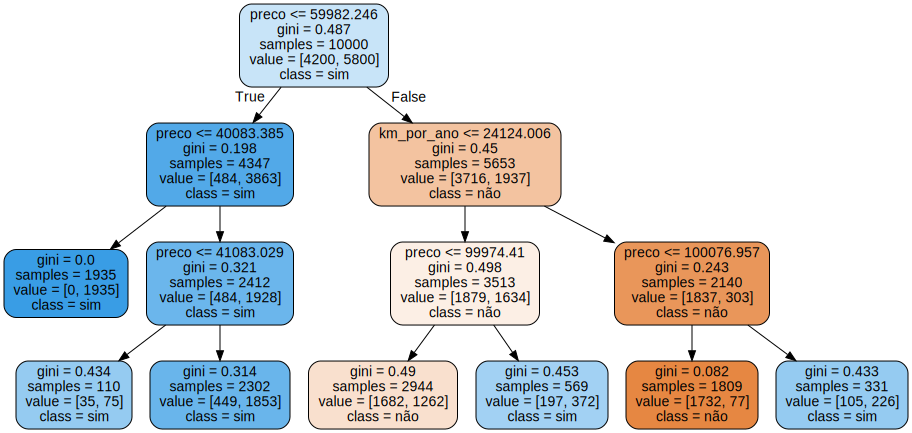

In [83]:
melhor.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph